## 线性回归
* 代码讲解    
在随机点上进行拟合

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


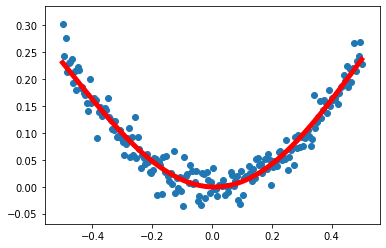

In [8]:
# 使用numpy生成200个随机点，作为样本
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis] #生成从-0.5到0.5均匀分布的200个数值，扩展到二维（200*1）
noise = np.random.normal(0,0.02,x_data.shape)   #生成随机值，形状和x_data一样
y_data = np.square(x_data) + noise


# 定义两个placeholder
x = tf.placeholder(tf.float32,[None, 1])    #(浮点型，定义形状[行不确定，列为一列])
y = tf.placeholder(tf.float32,[None, 1])


# 定义神经网络中间层（10个神经元）
Weights_L1 = tf.Variable(tf.random.normal([1,10]))  #权重，tensorflow中的变量，赋值随机数（1*10）[输入层个数，中间层个数]
biases_L1 = tf.Variable(tf.zeros([1,10]))   #偏置，初始化为0
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1  #信号的总和，矩阵乘法（输入一个矩阵，权值也是矩阵）+偏置
L1 = tf.nn.tanh(Wx_plus_b_L1)   #双曲正切函数作为激活函数，得到中间层的输出L1


# 定义神经网络输出层（1个神经元）
Weights_L2 = tf.Variable(tf.random.normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 定义二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))   #真实值-预测值，再求平均值
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)  #学习率为0.1，最小化loss


#定义绘画
with tf.Session() as sess:
    #变量的初试化（只要使用到就要初始化）
    sess.run(tf.global_variables_initializer())
    for _ in range (2000):   #训练2000次
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图显示预测的结果
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()


![](images/3-1.1.png)